## Finding the Best Markets to Advertise in

The goal in this project is to help an e-learning company find out the two best markets to advertise their product in

In [1]:
import pandas as pd

In [2]:
fcc = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)

In [3]:
pd.options.display.max_columns = 150 # to avoid truncated output 
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

#### Role participants interested in working in

In [4]:
job_interest_percentage = (fcc["JobRoleInterest"].value_counts(normalize=True)*100)
job_interest_percentage.head()

Full-Stack Web Developer     11.770595
  Front-End Web Developer     6.435927
  Data Scientist              2.173913
Back-End Web Developer        2.030892
  Mobile Developer            1.673341
Name: JobRoleInterest, dtype: float64

Text(0.5,1,'Roles People Interested in (%)')

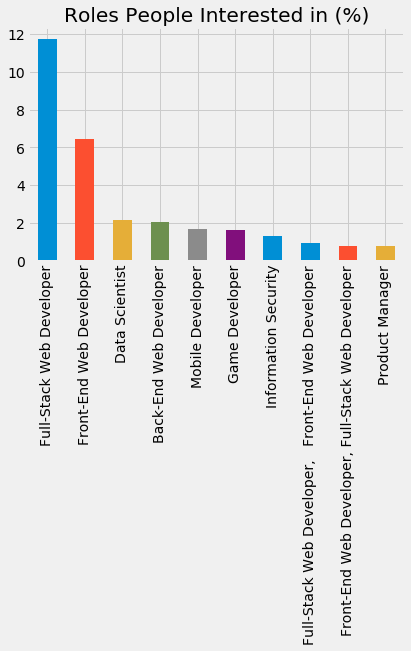

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

job_interest_percentage[:10].plot.bar()
plt.title('Roles People Interested in (%)')

#### Participants interested in more than one subject

In [6]:
# Split each string in the 'JobRoleInterest' column
n_of_options_nonull = fcc["JobRoleInterest"].dropna()
n_of_options_split = n_of_options_nonull.apply(lambda x: x.split(','))
# Frequency table for the var describing the number of options
n_of_options = n_of_options_split.apply(lambda x: len(x))
job_options = n_of_options.value_counts(normalize=True)*100
print(job_options)

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64


#### Interest in our focus (web and mobile developer)

In [7]:
web_or_mobile = fcc["JobRoleInterest"].str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts()
print(freq_table)
freq_table_normal = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table_normal)

True     6030
False     962
Name: JobRoleInterest, dtype: int64
True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


6030 participants are interested in the courses we are focoused on (web and mobile development)

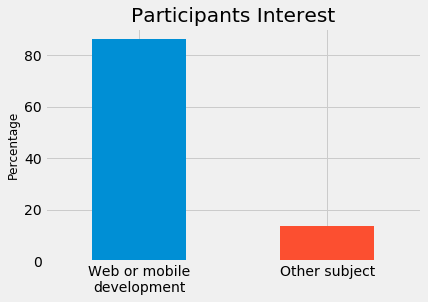

In [8]:
plt.style.use('fivethirtyeight')

freq_table_normal.plot.bar(rot=0)
plt.title('Participants Interest')
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)

plt.show()

### Finding where the coders live

In [9]:
fcc_good = fcc.dropna(subset=["JobRoleInterest"]).copy()
# fcc_good = fcc[fcc['JobRoleInterest'].notnull()]

# Relative frequencies
relative_freq = fcc_good['CountryLive'].value_counts(normalize=True).head(10)*100
# Absolute frequencies
absolute_freq = fcc_good['CountryLive'].value_counts().head(10)

pd.DataFrame({"Relative Frequencies": relative_freq
             , "Absolute Frequencies": absolute_freq})

,Absolute Frequencies,Relative Frequencies
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Most participants live in the US, India, the UK and Canada


### Analysing the Money Available for Learning

In [10]:
# Replace 0 with 1, show the number of null values
fcc_good["MonthsProgramming"].replace(0, 1, inplace=True)
# The amount of money a student has spent per month 
fcc_good["MoneyPerMonth"] = fcc_good["MoneyForLearning"] / fcc_good["MonthsProgramming"]
print(fcc_good["MoneyPerMonth"].isnull().sum())
# Remove rows with null values for the new and CountryLive columns
fcc_good.dropna(subset=["MoneyPerMonth", "CountryLive"], inplace=True)

675


#### Average spent per month in the US, India, the United Kingdom and Canada

In [11]:
# money_by_country = fcc_good[["CountryLive","MoneyForLearning"]].groupby("CountryLive").agg({'CountryLive':'size', 'MoneyForLearning':'mean'})
money_by_country = fcc_good[["CountryLive","MoneyPerMonth"]].groupby("CountryLive").mean()
money_by_country["MoneyPerMonth"][["United States of America", "India", "Canada", "United Kingdom"]]

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MoneyPerMonth, dtype: float64

The results for the UK and Canada are surprisingly low. We should analyse the outliers.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


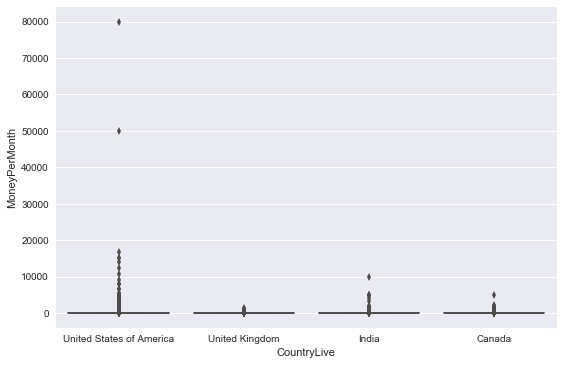

In [12]:
import seaborn as sns

top_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = top_4)

In [13]:
## Remove the outliers
outlier_condition = top_4["MoneyPerMonth"] <= 10000
top_4 = top_4[outlier_condition]

Repeate the process to make sure there is no outliers

In [14]:
top_4.groupby("CountryLive").mean()["MoneyPerMonth"]

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    155.459187
Name: MoneyPerMonth, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


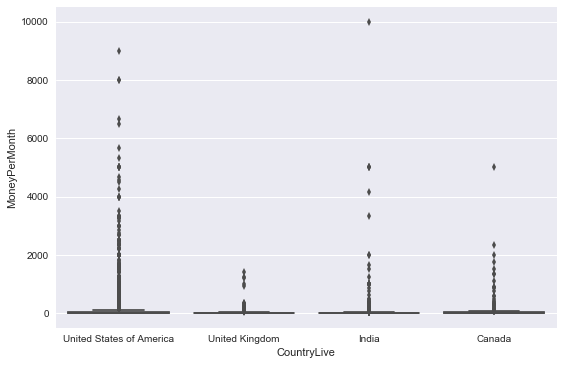

In [15]:
# top_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = top_4)

In [16]:
india_outliers = top_4[(top_4['CountryLive'] == 'India') &  (top_4['MoneyPerMonth'] >= 2500)]
top_4 = top_4.drop(india_outliers.index)
canada_outliers = top_4[(top_4['CountryLive'] == 'Canada') & (top_4['MoneyPerMonth'] > 4500)]
top_4 = top_4.drop(canada_outliers.index)

In [17]:
# US outliers: paid more than 6000 a month, never attended a bootcamp or have been programming for less than 3 months
us_outliers_1 = top_4[(top_4['CountryLive'] == 'United States of America') &  (top_4['MoneyPerMonth'] >= 6000)]
top_4 = top_4.drop(us_outliers_1.index)
us_outliers_2 = top_4[(top_4['CountryLive'] == 'United States of America') & (top_4['MoneyPerMonth'] >= 6000) &(top_4['AttendedBootcamp'] == 0)]
top_4 = top_4.drop(us_outliers_2.index)
us_outliers_3 = top_4[(top_4['CountryLive'] == 'United States of America') & (top_4['MoneyPerMonth'] >= 6000) & (top_4['MonthsProgramming'] <= 3)]
top_4 = top_4.drop(us_outliers_3.index)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


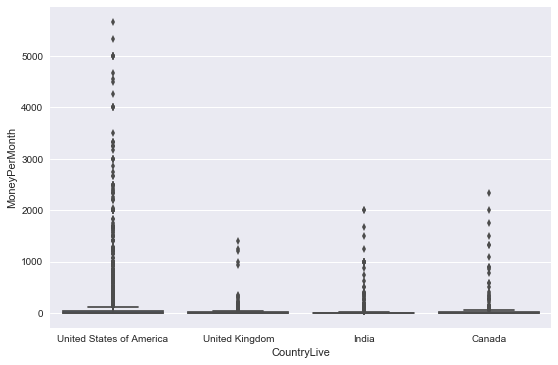

In [18]:
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = top_4)

In [19]:
top_4.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

In [20]:
top_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

### US is the best market to advertise in